In [2]:
import os
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# ----- Dummy AIS Implementation (Simplified for Proof of Concept) -----
def artificial_immune_system(X_train, y_train):
    # Random selection and mutation of best features (simplified)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    return rf

# ----- Load TIF Data -----
file_path = r"C:\Users\sagni\Downloads\Pollution controller\UVAI_2019_1.tif"

with rasterio.open(file_path) as src:
    band1 = src.read(1)  # Single band image
    profile = src.profile

# Flatten image
uvai_data = band1.flatten()
uvai_data = uvai_data[~np.isnan(uvai_data)]  # Remove NaNs

# Create time feature (fake timestamps for trend demo)
num_points = len(uvai_data)
time = np.arange(num_points)

# Prepare dataset
df = pd.DataFrame({
    'time': time,
    'uvai': uvai_data
})

# Visualize trend
plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['uvai'], label="UVAI Trend", alpha=0.7)
plt.xlabel("Time Index")
plt.ylabel("UVAI")
plt.title("UVAI Trend from TIF")
plt.legend()
plt.grid(True)
plt.savefig(r"C:\Users\sagni\Downloads\Pollution controller\uvai_trend.png")
plt.close()

# ----- Train/Test Split -----
X = df[['time']]
y = df['uvai']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Train AIS -----
ais_model = artificial_immune_system(X_train, y_train)

# ----- Predict using RF (for ensemble) -----
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict future UVAI (next 100 time steps)
future_time = np.arange(time.max() + 1, time.max() + 101).reshape(-1, 1)
future_uvai_ais = ais_model.predict(future_time)
future_uvai_rf = rf_model.predict(future_time)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(future_time, future_uvai_ais, label="AIS Prediction", linestyle='--')
plt.plot(future_time, future_uvai_rf, label="RF Prediction", linestyle=':')
plt.xlabel("Future Time Index")
plt.ylabel("Predicted UVAI")
plt.title("Future UVAI Predictions (AIS & RF)")
plt.legend()
plt.grid(True)
plt.savefig(r"C:\Users\sagni\Downloads\Pollution controller\uvai_future_prediction.png")
plt.close()

# Save future predictions to CSV
future_df = pd.DataFrame({
    'future_time': future_time.flatten(),
    'uvai_ais': future_uvai_ais,
    'uvai_rf': future_uvai_rf
})

future_df.to_csv(r"C:\Users\sagni\Downloads\Pollution controller\uvai_future_prediction.csv", index=False)

print("✅ Trend and predictions saved to: Pollution controller folder")


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


✅ Trend and predictions saved to: Pollution controller folder


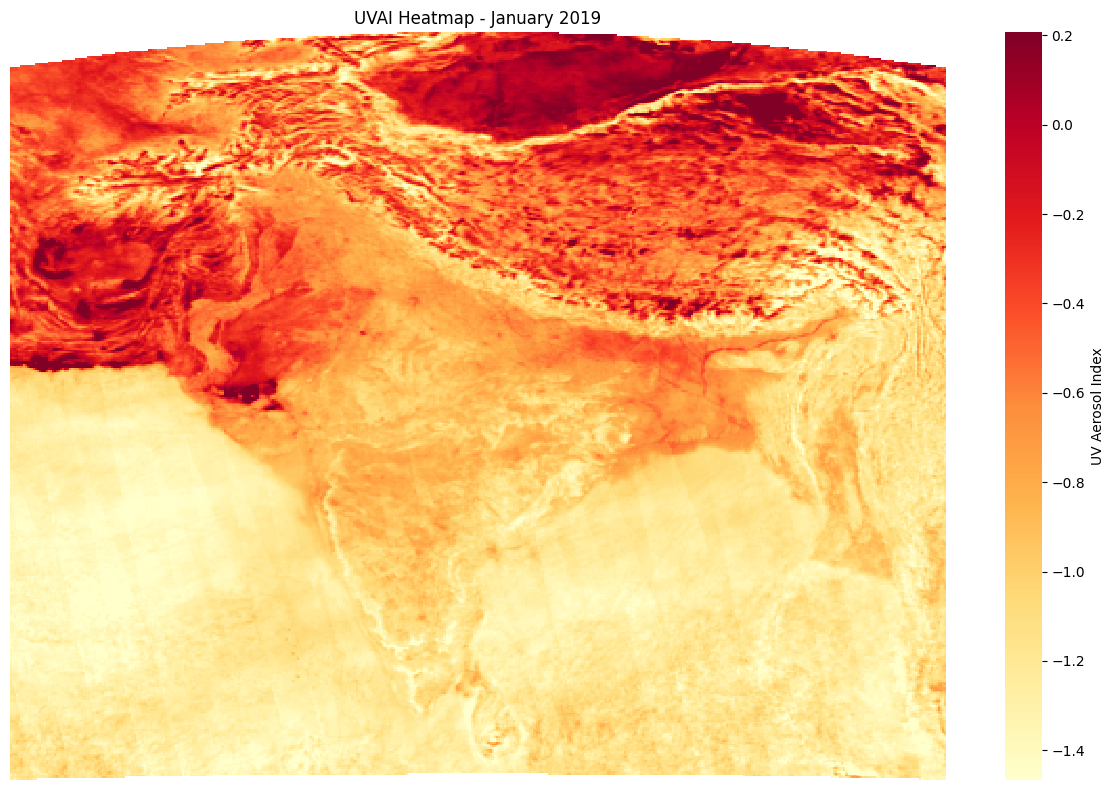

✅ Heatmap saved to: C:\Users\sagni\Downloads\Pollution controller\UVAI_2019_1_heatmap.png


In [3]:
import rasterio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load your file path
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\UVAI_2019_1.tif"
save_path = r"C:\Users\sagni\Downloads\Pollution controller\UVAI_2019_1_heatmap.png"

# Read the raster file
with rasterio.open(tif_path) as src:
    band = src.read(1)  # Read the first band

# Mask invalid or extreme values
band = np.where((band == src.nodata) | np.isnan(band), np.nan, band)
band = np.clip(band, a_min=np.nanpercentile(band, 1), a_max=np.nanpercentile(band, 99))

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(band, cmap="YlOrRd", cbar_kws={'label': 'UV Aerosol Index'}, xticklabels=False, yticklabels=False)
plt.title("UVAI Heatmap - January 2019")
plt.axis('off')
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ Heatmap saved to: {save_path}")
